In [1]:
import os
import numpy
import matplotlib.pyplot as plt
import math

In [2]:
X = numpy.zeros((320, 10304))
Xtest = numpy.zeros((80, 10304))
Y = numpy.zeros(320)
Ytest = numpy.zeros(80)

j = 0
i = 0
for subdir in os.listdir("final_dataset/at&t/"):
    person = os.path.join("final_dataset/at&t/", subdir)
    count = 0
    avgFace = []
    for imagefile in os.listdir(person):
        count += 1
        imageloc = os.path.join(person, imagefile)
        image = plt.imread(imageloc)
        curperson = int(subdir[1:])
        if count < 9:
            X[i, :] = image.flatten()
            Y[i] = curperson
            i += 1
        if count >= 9:
            Xtest[j, :] = image.flatten()
            Ytest[j] = curperson
            j += 1
    h, w = image.shape


In [3]:
indices = numpy.argsort(Y)
Ytrain = Y[indices]
Xtrain = X[indices, :]

A = Xtrain.T
mean_imgs = numpy.reshape(A.mean(axis=1), (10304, 1))
A = A - numpy.reshape(A.mean(axis=1), (10304, 1))


def calculating_eigen_vectors(A):
    U, D, Vt = numpy.linalg.svd(A.T @ A)
    evects = A @ Vt.T
    norm = numpy.linalg.norm(evects, axis=0)
    return evects / norm


evects = calculating_eigen_vectors(A)


Examples of reconstruction using different number of eigenfaces taken


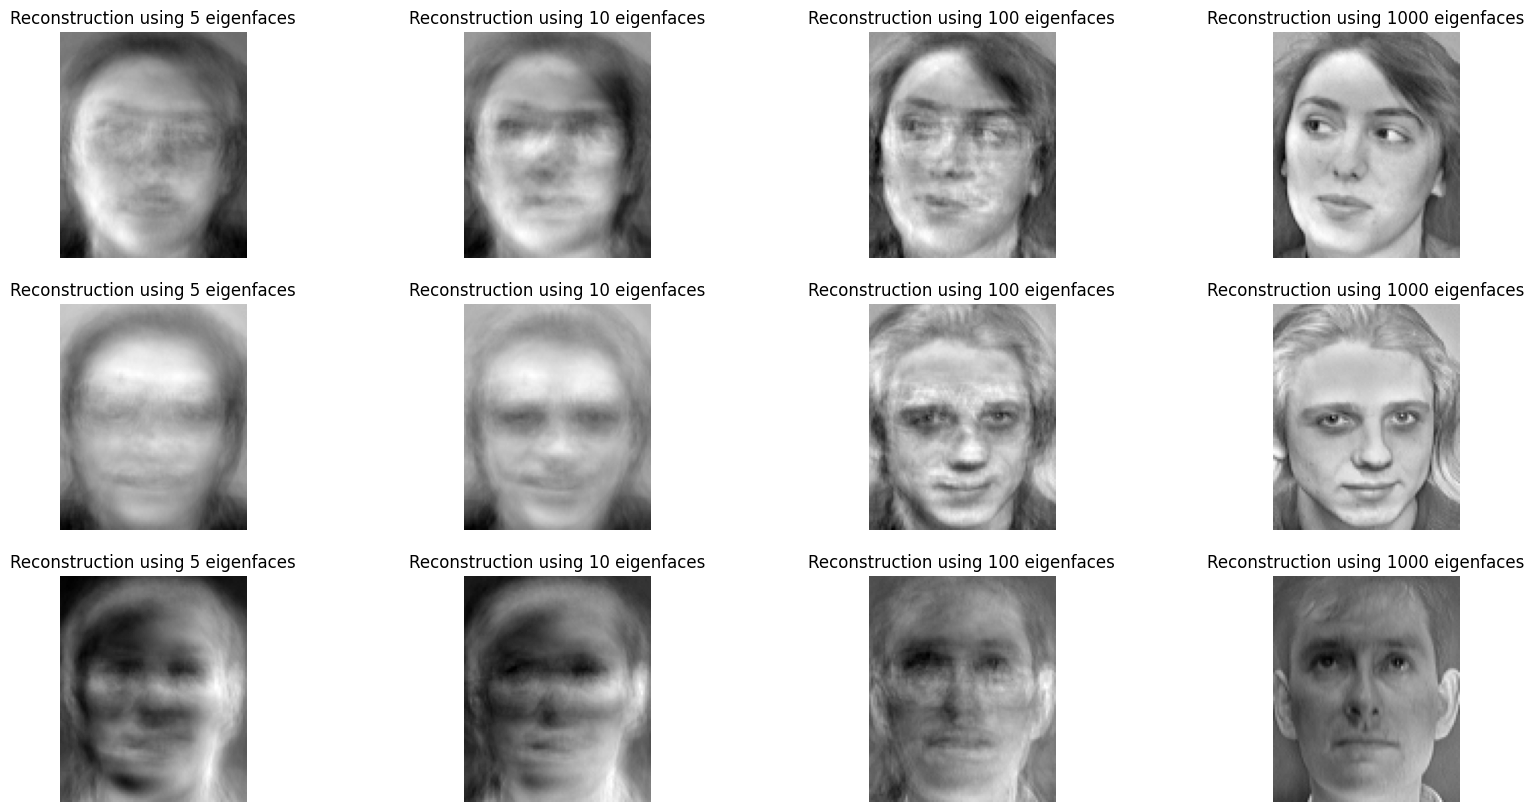

In [4]:
def reducedA(k, eV, A):
    Areduced = eV[:, :k].T @ A
    Arecovered = eV[:, :k] @ Areduced
    return Arecovered


print("Examples of reconstruction using different number of eigenfaces taken")
fig = plt.figure(figsize=(20, 10))
eigenfaces_no = [5, 10, 100, 1000]
face_id = [60, 90, 190]
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    plt.imshow(
        reducedA(eigenfaces_no[i % 4], evects, A)[
            :, face_id[math.floor(i / 4)]
        ].reshape((h, w)),
        cmap="gray",
    )
    plt.title("Reconstruction using " + str(eigenfaces_no[i % 4]) + " eigenfaces")
    plt.axis("off")

plt.show()


In [5]:
def which_trained_face(test_img, espace, mean_face, X_train, Y_train, actual=None):
    smallest_norm = 0x3F3F3F3F
    test_img = numpy.reshape(test_img, (10304, 1)) - mean_face

    for i in range(X_train.shape[0]):
        if i != actual or i is None:
            cur_img = numpy.reshape(X_train[i], (10304, 1)) - mean_face

            reduced_img = espace.T @ cur_img
            test_img_espace = espace.T @ test_img

            norm = numpy.linalg.norm(reduced_img - test_img_espace)

            if smallest_norm > norm:
                smallest_norm = norm
                person = Y_train[i]
                out = cur_img
    return person, out


In [6]:
c1 = 0
for i in range(len(Xtest)):
    per1, out1 = which_trained_face(
        Xtest[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    if Ytest[i] == per1:
        print(f"CORRECT GUESS for i={i}")
        c1 += 1
    else:
        print(f"WRONG GUESS for i={i}")
c1 = (c1 / len(Xtest)) * 100
print(f"Final accuracy of test images = {c1}%")


CORRECT GUESS for i=0
CORRECT GUESS for i=1
CORRECT GUESS for i=2
CORRECT GUESS for i=3
CORRECT GUESS for i=4
CORRECT GUESS for i=5
CORRECT GUESS for i=6
CORRECT GUESS for i=7
CORRECT GUESS for i=8
CORRECT GUESS for i=9
CORRECT GUESS for i=10
CORRECT GUESS for i=11
CORRECT GUESS for i=12
CORRECT GUESS for i=13
CORRECT GUESS for i=14
CORRECT GUESS for i=15
CORRECT GUESS for i=16
CORRECT GUESS for i=17
CORRECT GUESS for i=18
CORRECT GUESS for i=19
CORRECT GUESS for i=20
CORRECT GUESS for i=21
CORRECT GUESS for i=22
CORRECT GUESS for i=23
CORRECT GUESS for i=24
CORRECT GUESS for i=25
CORRECT GUESS for i=26
CORRECT GUESS for i=27
CORRECT GUESS for i=28
CORRECT GUESS for i=29
CORRECT GUESS for i=30
CORRECT GUESS for i=31
CORRECT GUESS for i=32
CORRECT GUESS for i=33
CORRECT GUESS for i=34
CORRECT GUESS for i=35
CORRECT GUESS for i=36
CORRECT GUESS for i=37
CORRECT GUESS for i=38
CORRECT GUESS for i=39
CORRECT GUESS for i=40
CORRECT GUESS for i=41
CORRECT GUESS for i=42
CORRECT GUESS for i=4

In [7]:
def plot_guesses(Xtest, Ytest, out, per):
    fig = plt.figure(figsize=(5, 40))

    fig.add_subplot(1, 2, 1)
    plt.imshow(Xtest.reshape((h, w)), cmap="gray")
    plt.title(f"Actual Class no.{Ytest}")

    fig.add_subplot(1, 2, 2)
    plt.imshow(out.reshape((h, w)), cmap="gray")
    plt.title(f"Prediction Class no.{per}")


## Correct Guesses

/tmp/ipykernel_265312/2904878275.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 40))


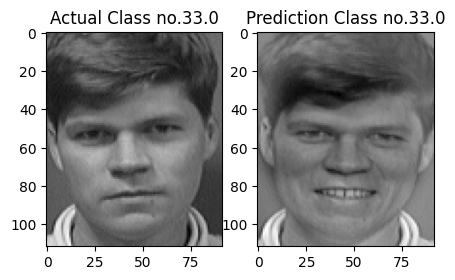

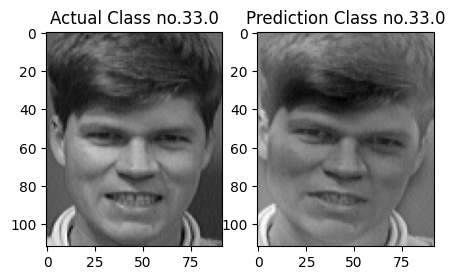

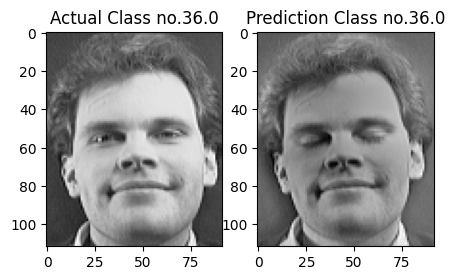

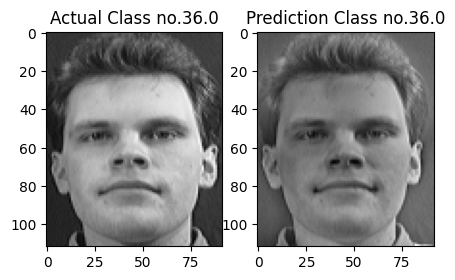

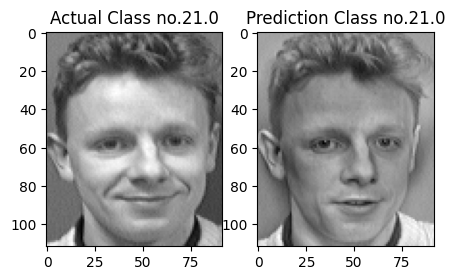

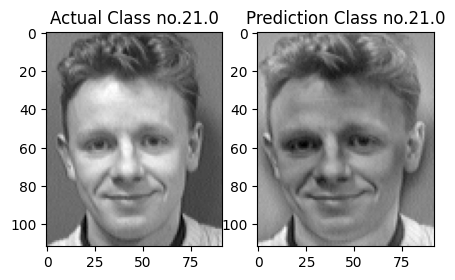

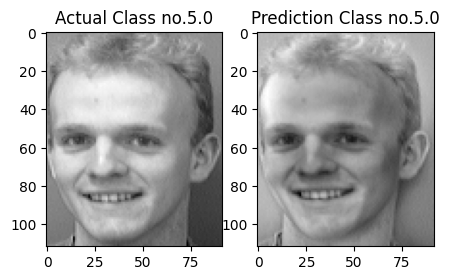

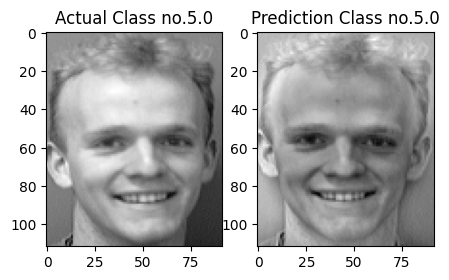

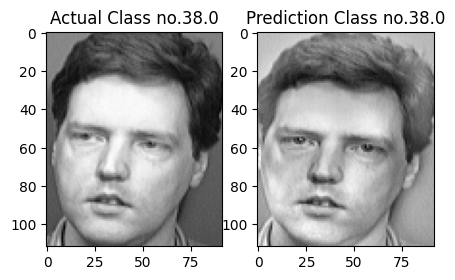

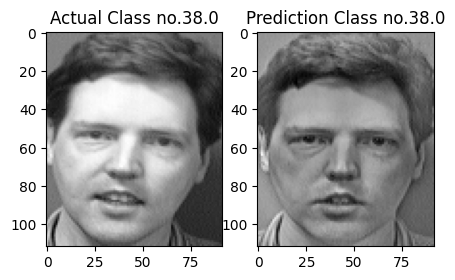

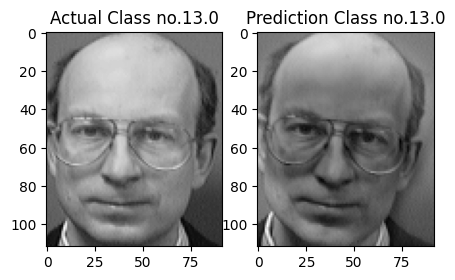

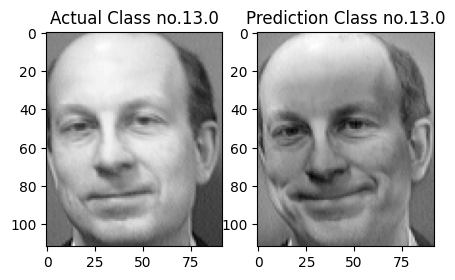

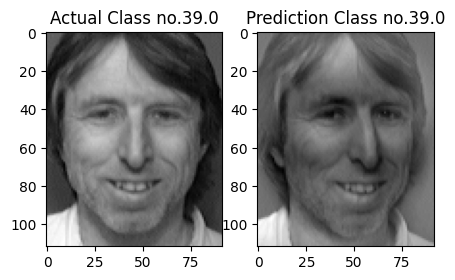

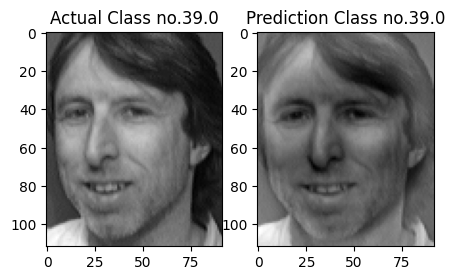

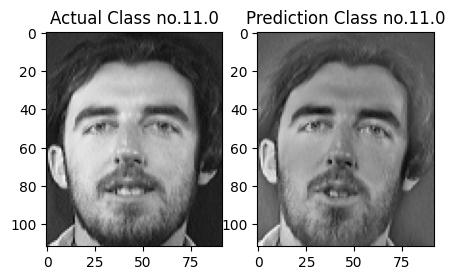

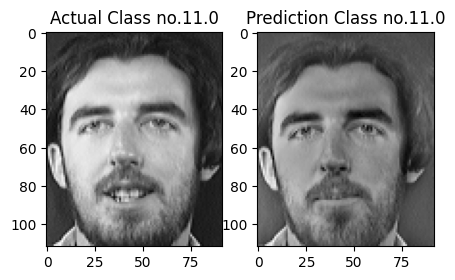

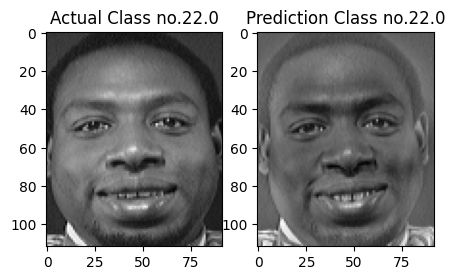

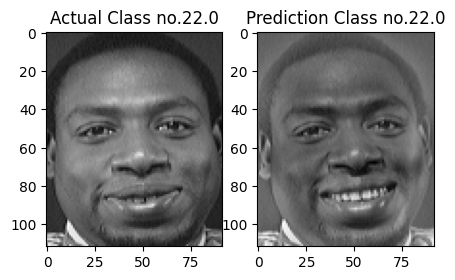

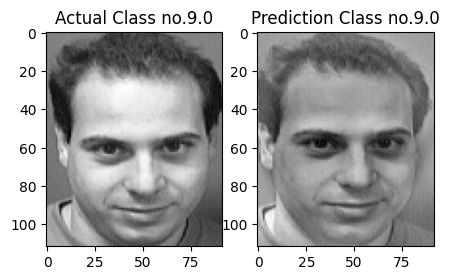

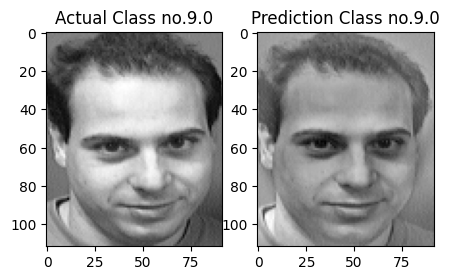

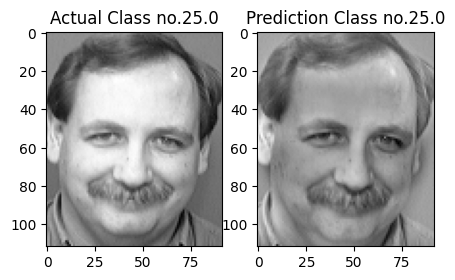

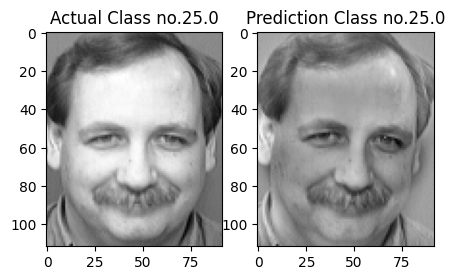

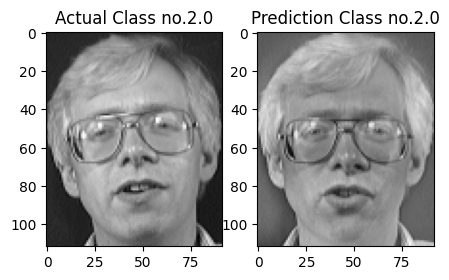

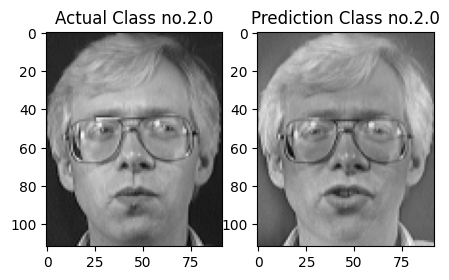

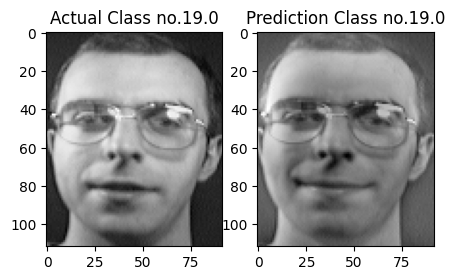

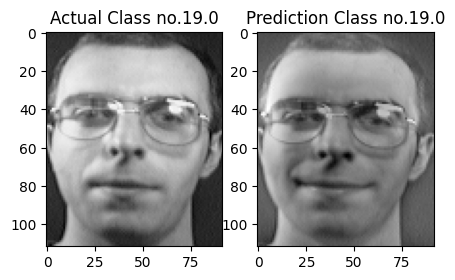

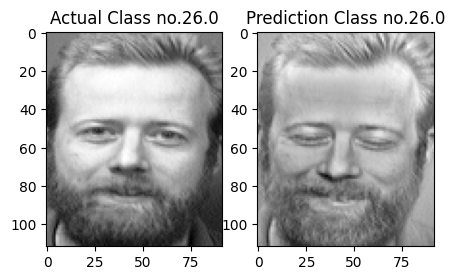

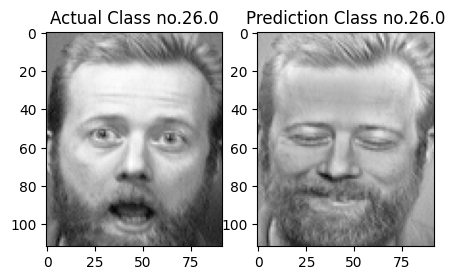

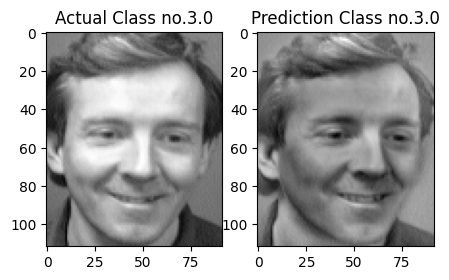

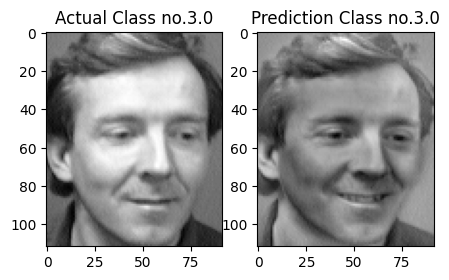

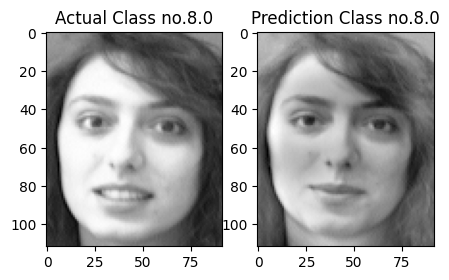

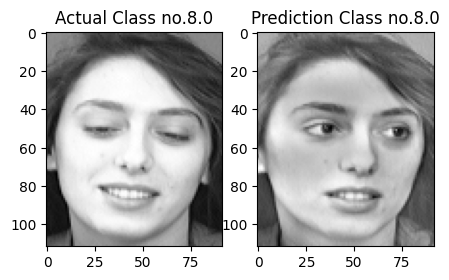

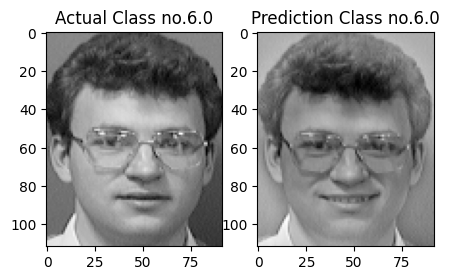

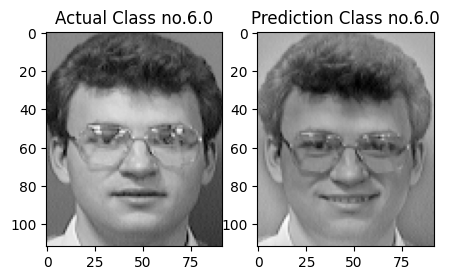

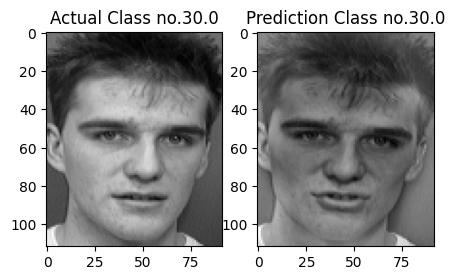

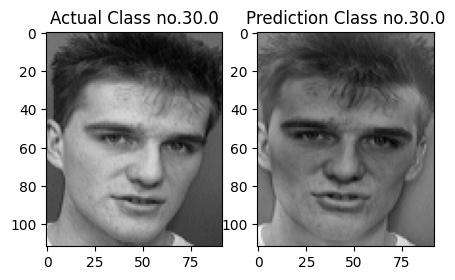

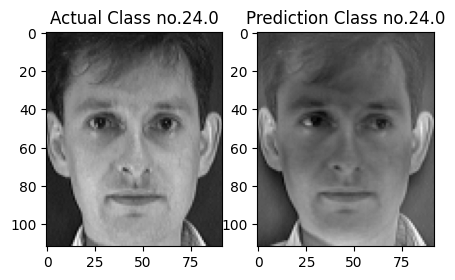

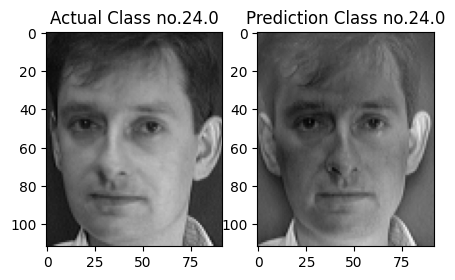

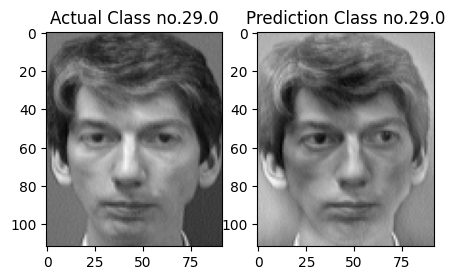

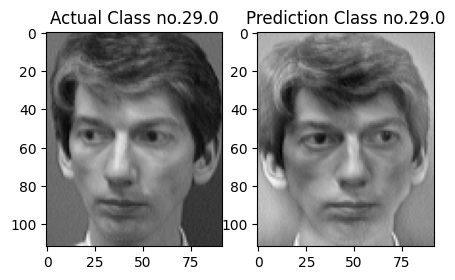

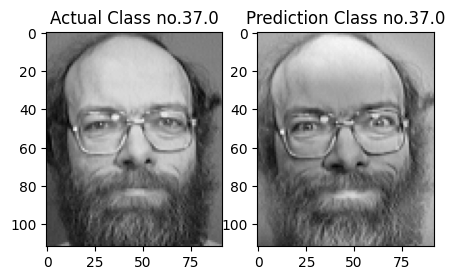

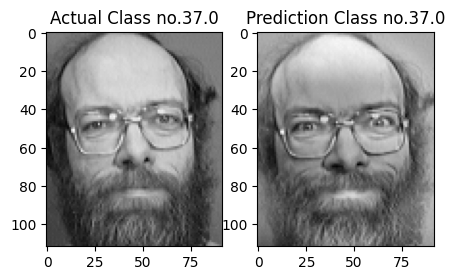

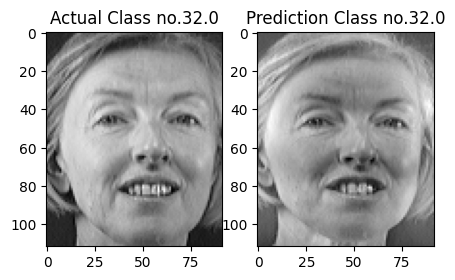

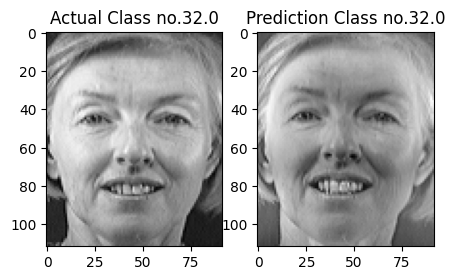

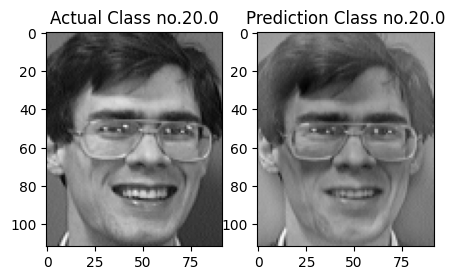

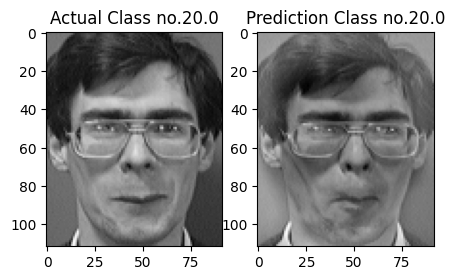

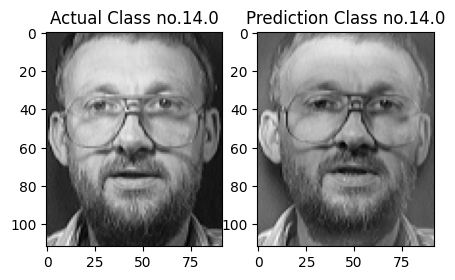

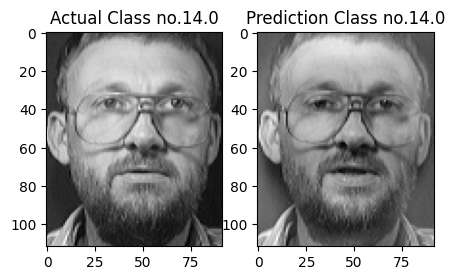

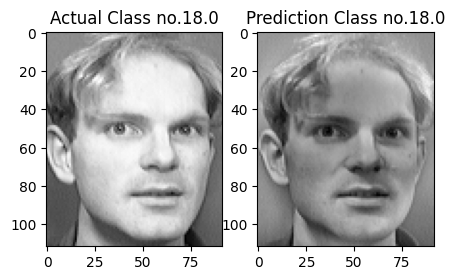

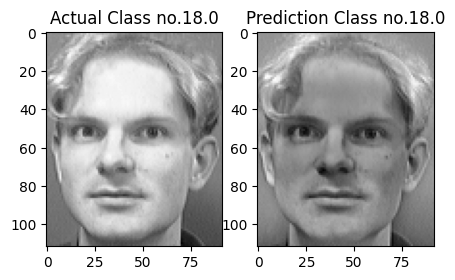

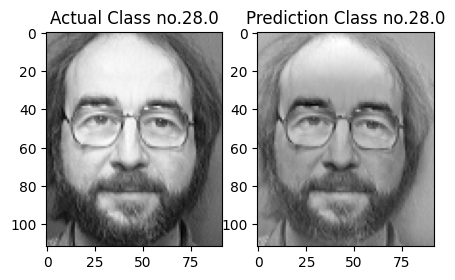

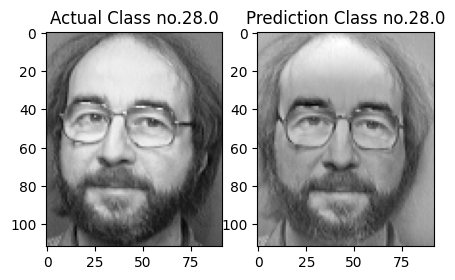

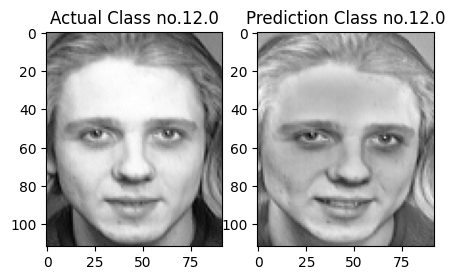

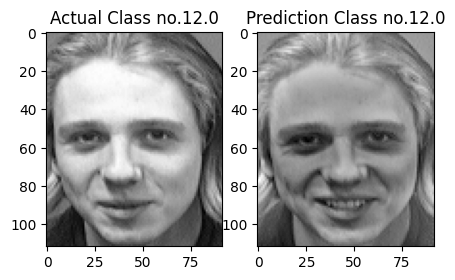

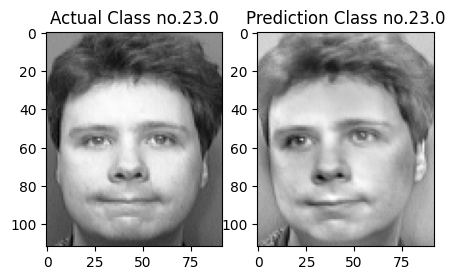

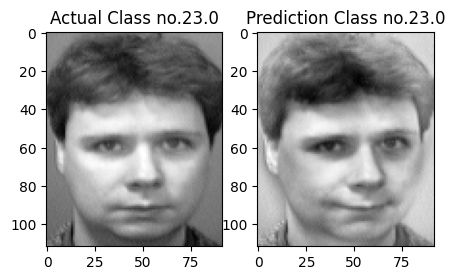

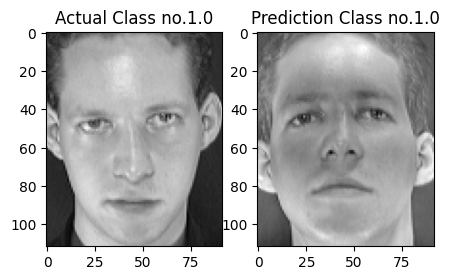

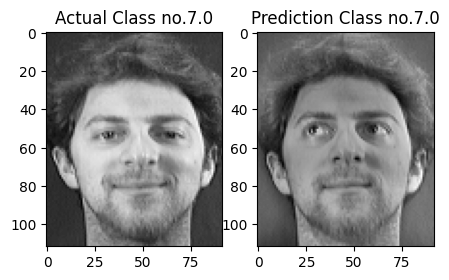

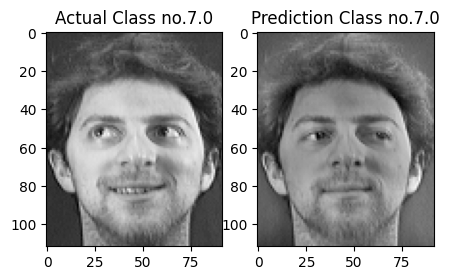

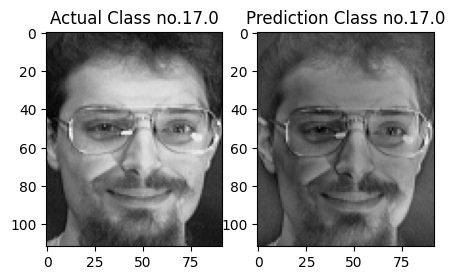

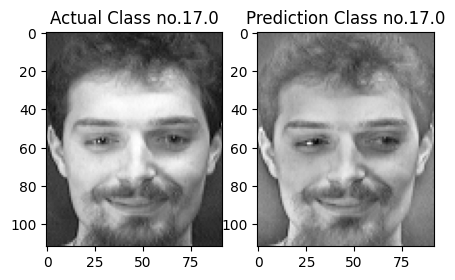

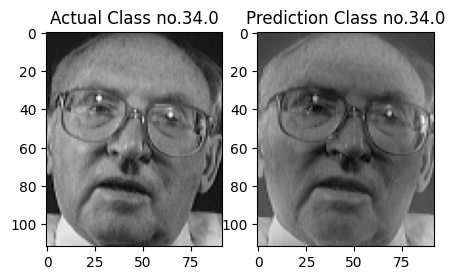

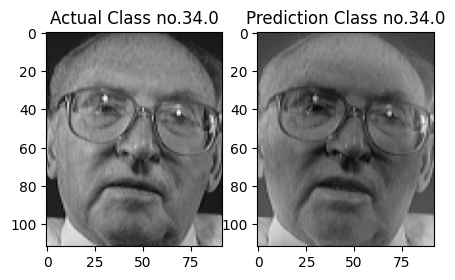

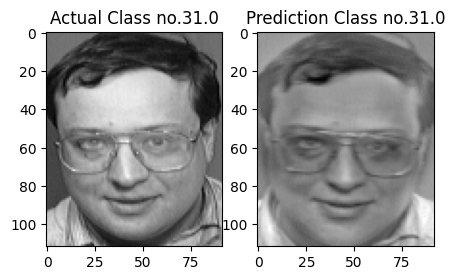

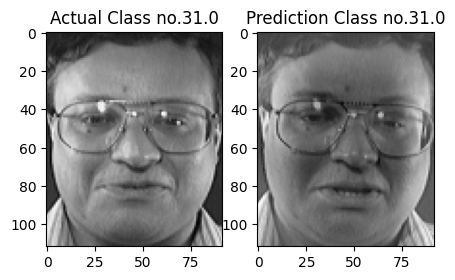

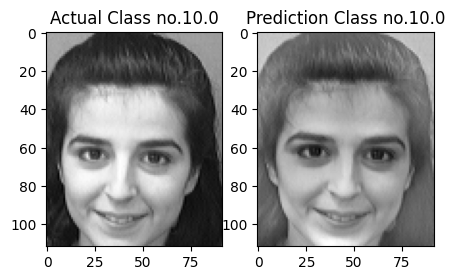

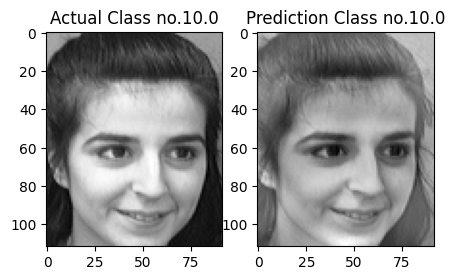

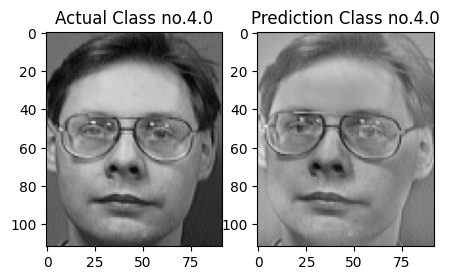

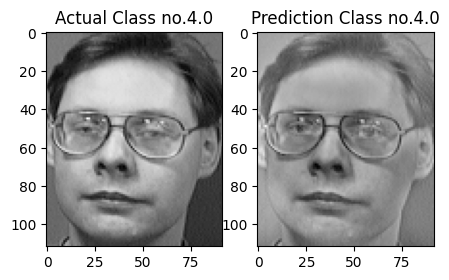

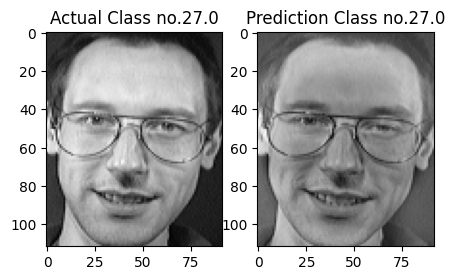

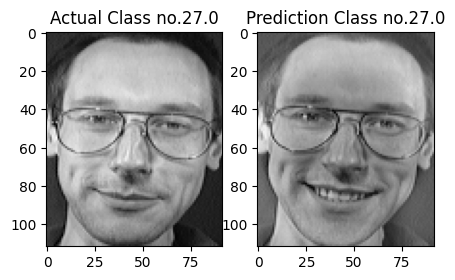

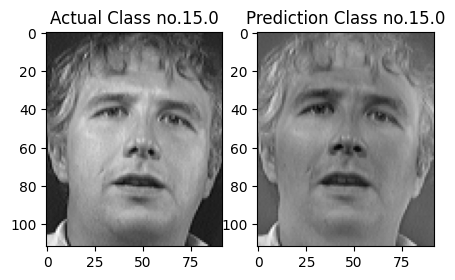

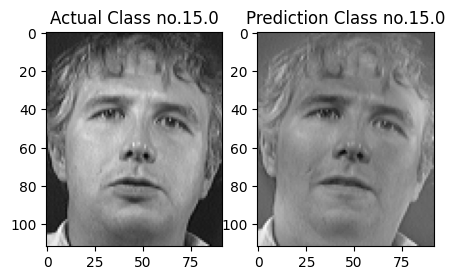

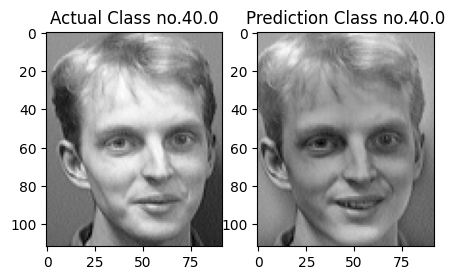

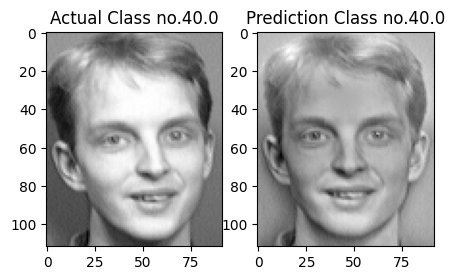

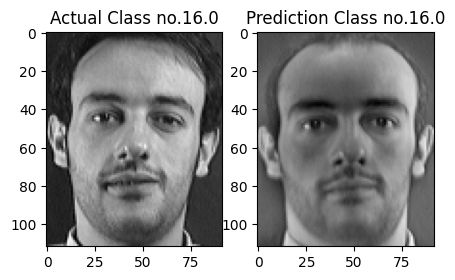

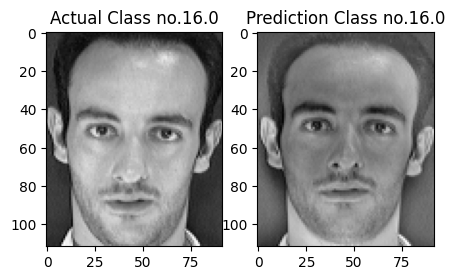

In [8]:
correct_guesses = []
correct_output = []
correct_person = []
for i in range(len(Xtest)):
    per1, out1 = which_trained_face(
        Xtest[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    if Ytest[i] == per1:
        correct_guesses.append(i)
        correct_output.append(out1)
        correct_person.append(per1)

for i in range(len(correct_guesses)):
    plot_guesses(
        Xtest[correct_guesses[i]],
        Ytest[correct_guesses[i]],
        correct_output[i],
        correct_person[i],
    )


## Incorrect Guesses

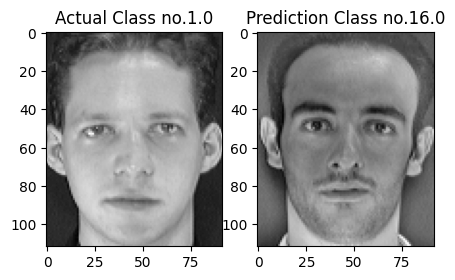

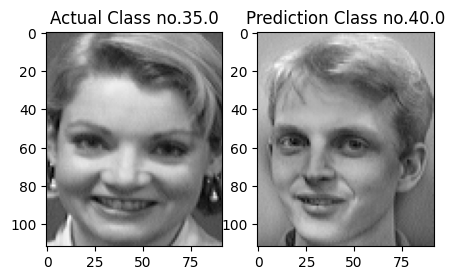

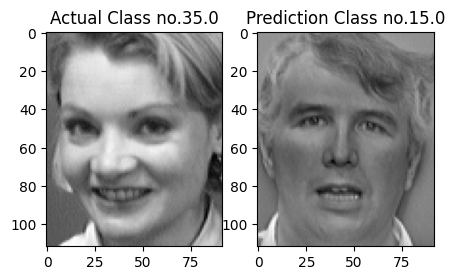

In [9]:
incorrect_guesses = []
incorrect_output = []
incorrect_person = []
for i in range(len(Xtest)):
    per1, out1 = which_trained_face(
        Xtest[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    if Ytest[i] != per1:
        incorrect_guesses.append(i)
        incorrect_output.append(out1)
        incorrect_person.append(per1)

for i in range(len(incorrect_guesses)):
    plot_guesses(
        Xtest[incorrect_guesses[i]],
        Ytest[incorrect_guesses[i]],
        incorrect_output[i],
        incorrect_person[i],
    )


## Check guess class for any images within the training class

Change val to an number between 0 and 320 to observe prediction of a training set image

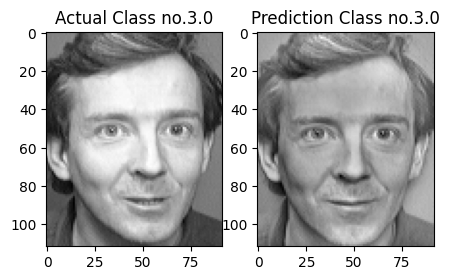

In [10]:
val = int(input("Enter image number (b/w 0,320): "))

per, out = which_trained_face(
    Xtrain[val], evects[:, 0:10], mean_imgs, Xtrain, Ytrain, val
)
plot_guesses(Xtrain[val], Ytrain[val], out, per)
